# Plot spatial data for 20CR

In [1]:
import xarray as xr, matplotlib.pyplot as plt
from importlib import reload # need to use this if I edit a function file
import os
import numpy as np
import pandas as pd
import cartopy.crs as ccrs # to add in continents and change map projections 
from matplotlib.colors import LinearSegmentedColormap # to change colour bar????
import dask.diagnostics # dask allows you to check how long something is taking to load
import climtas # needed to count event statistics with a specified duration

In [2]:
# import custom functions
import sys 
sys.path.append('/home/563/kb6999/Functions') # use this if the function file is in a different directory to the notebook

import frequently_used_functions as func
import plotting_functions as fplot
import model_functions as funcM
import reanalysis_functions as funcR

# 20CR data

## area weighting???

In [6]:
# define path where netcdsf of temperature are stored
path = '/g/data/w48/kb6999/20CR_TMP_data_for_plots/'

In [8]:
# open lat lon mean of temperature 
mmm_mon_Glob = xr.open_dataset(f'{path}mmm_anom_glob.nc')

In [38]:
# select out dates around kraktoa eruption 
K_mmm_mon_Glob = mmm_mon_Glob.sel(time = slice('1880','1990'))

In [10]:
# import landmask dataset 
landfrac_ds = xr.open_dataset('/g/data/w48/kb6999/20CR_data_netcdfs/land_20CR.nc')
landmask = landfrac_ds

In [50]:
# Select out SH and NH anomalies 
K_mmm_mon_SH = K_mmm_mon_Glob.sel(lat=slice(0,-90)) 
K_mmm_mon_NH = K_mmm_mon_Glob.sel(lat=slice(90,0)) 
# select out the Australian and E Australian anomalies 
K_mmm_mon_Aus = K_mmm_mon_Glob.sel(lat=slice(-10,-50), lon=slice(110,160)).where(landmask.LAND==1.0, drop=True)
K_mmm_mon_EA = K_mmm_mon_Glob.sel(lat=slice(-5,-50), lon=slice(140,155)).where(landmask.LAND==1.0, drop=True)

In [51]:
K_mmm_mon_Aus

<xarray.Dataset>
Dimensions:  (lat: 44, lon: 57, time: 1332)
Coordinates:
  * lat      (lat) float64 -10.18 -11.58 -12.28 -12.98 ... -41.75 -42.46 -43.16
  * lon      (lon) float64 113.9 114.6 115.3 116.0 ... 151.1 151.8 152.6 153.3
  * time     (time) datetime64[ns] 1880-01-31 1880-02-29 ... 1990-12-31
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    tmp      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

## open netcdfs here!!

## Figures

In [24]:
# eruption dates
e_date = ['1883-08','1902-10', '1963-03', '1982-04', '1991-06']
e_post6mon = ['1884-02', '1903-04', '1963-09', '1982-10', '1991-12']
e_post12mon = ['1884-08','1903-10', '1964-03', '1983-04', '1992-06']
e_post24mon = ['1885-08','1904-10', '1965-03', '1984-04', '1993-06']

In [25]:
# dates and title for eruption and 3 times after
K_dates = [e_date[0], e_post6mon[0], e_post12mon[0], e_post24mon[0]]
title_label = ['Eruption month, ', '6 months post-eruption, ', '12 months post-eruption, ', '24 months post-eruption, ']

In [26]:
titles=[]
for i,vals in enumerate(K_dates):
    t = title_label[i] + K_dates[i]
    titles.append(t)
titles

['Eruption month, 1883-08',
 '6 months post-eruption, 1884-02',
 '12 months post-eruption, 1884-08',
 '24 months post-eruption, 1885-08']

In [27]:
# define degree sign
deg = u'\N{DEGREE SIGN}'

In [35]:
# set the mod max for the colour bars
cmax_tmp = 2
cmax_pr = 2

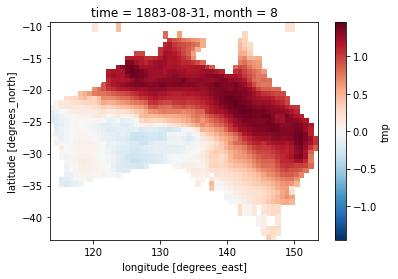

In [53]:
K_mmm_mon_Aus.sel(time=K_dates[0]).tmp.plot()

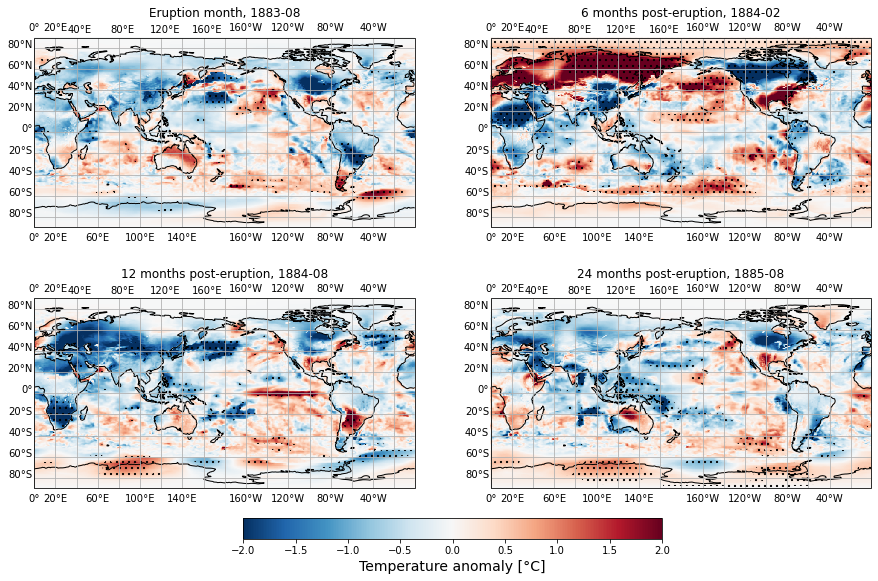

In [36]:
# plot of global monthly member mean temperature at 4 discrete time periods (not averaged)
fig = fplot.spatial_plot(2, 2, K_mmm_mon_Glob.tmp, cmax_tmp, K_dates, titles, 'RdBu_r', f'Temperature anomaly [{deg}C]', 1)

fig.set_figwidth(15)
fig.set_figheight(11) # these two parameters change the figure height and width 

plt.savefig('R_spatial_tmp_Glob.png', dpi=300)# , bbox_inches='tight') # bbox=tight removes lat labels when figure saves

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


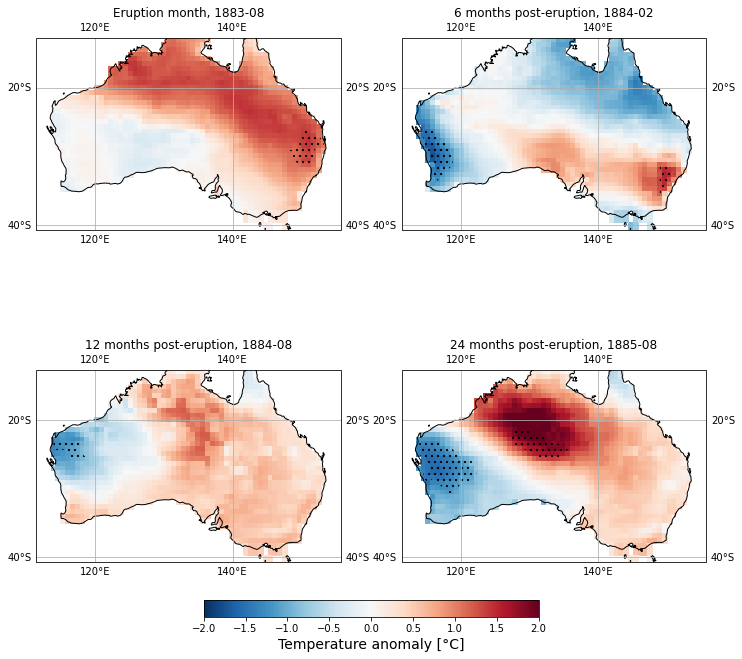

In [52]:
# plot of Aus monthly member mean temperature
fig = fplot.spatial_plot(2, 2, K_mmm_mon_Aus.tmp, cmax_tmp, K_dates, titles, 'RdBu_r', f'Temperature anomaly [{deg}C]', 1)

fig.set_figwidth(12)
fig.set_figheight(14) # these two parameters change the figure height and width 

plt.savefig('R_spatial_tmp_Aus.png', dpi=300, bbox_inches='tight')

In [40]:
# plot of global monthly member mean precipitation
fig = fplot.spatial_plot(2, 2, K_mmm_mon_Glob.pr, cmax_pr, K_dates, titles, 'BrBG','Precipitation anomaly [mm/day]', 1)

fig.set_figwidth(15)
fig.set_figheight(11) # these two parameters change the figure height and width 

plt.savefig('R_spatial_pr_Glob.png', dpi=300)#, bbox_inches='tight')

AttributeError: 'Dataset' object has no attribute 'pr'

In [41]:
# plot of Aus monthly member mean precipitation
fig = fplot.spatial_plot(2, 2, K_mmm_mon_Aus.pr, cmax_pr, K_dates, titles, 'BrBG','Precipitation anomaly [mm/day]', 1)

fig.set_figwidth(12)
fig.set_figheight(14) # these two parameters change the figure height and width 

plt.savefig('R_spatial_pr_Aus.png', dpi=300, bbox_inches='tight')

AttributeError: 'Dataset' object has no attribute 'pr'